In [86]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fname = '/Users/emilymartin/Documents/data/SentiWS_v2/SentiWS_v2.0_Negative.txt'
f = open(fname)
negw = f.read()
f.close()

In [3]:
print(len(negw))
print(type(negw))

246244
<class 'str'>


In [4]:
print(negw[:60])

Abbau|NN	-0.058	Abbaus,Abbaues,Abbauen,Abbaue,Abbauten
Abbru


In [5]:
nsplit = re.split('\||\s', negw)
len(nsplit)

7309

In [6]:
nsplit[:10]

['Abbau',
 'NN',
 '-0.058',
 'Abbaus,Abbaues,Abbauen,Abbaue,Abbauten',
 'Abbruch',
 'NN',
 '-0.0048',
 'Abbruches,Abbrüche,Abbruchs,Abbrüchen,Abbruche',
 'Abdankung',
 'NN']

In [7]:
#worte = nsplit[::4] #Takes every fifth word
    # USEFUL TO KNOW, NOT GOOD FOR THIS TASK


#print(worte[:5])
#print(pos[:5])

In [8]:
worte = []
w = range(0, 7308, 4)  # take every fifth element #It was adding an empty '' at the end, not sure why
for x in w:
    worte.append(nsplit[x])
    
print(worte[:5])
print(len(worte))

['Abbau', 'Abbruch', 'Abdankung', 'Abdämpfung', 'Abfall']
1827


In [9]:
pos = []
p = range(1, 7309, 4) #Again, fifth element but starting at the second element 
for z in p:
    if z is None:
        pos.append('NaN')
    pos.append(nsplit[z])
    
print(pos[:5])
print(len(pos))

['NN', 'NN', 'NN', 'NN', 'NN']
1827


In [10]:
zahl = []
z = range(2, 7310, 4)  # take every fifth element, begin at third element
for y in z:
    zahl.append(nsplit[y])
    
print(zahl[:5])
print(len(zahl))

['-0.058', '-0.0048', '-0.0048', '-0.0048', '-0.0048']
1827


In [11]:
formen = []
f = range(3, 7311, 4)  # take every fifth element, begin at fourth element
for q in f:
    formen.append(nsplit[q])
    
print(formen[:5])
print(len(formen))

['Abbaus,Abbaues,Abbauen,Abbaue,Abbauten', 'Abbruches,Abbrüche,Abbruchs,Abbrüchen,Abbruche', 'Abdankungen', 'Abdämpfungen', 'Abfalles,Abfälle,Abfalls,Abfällen,Abfalle']
1827


In [12]:
print(len(worte))
print(len(pos))
print(len(zahl))
print(len(formen))

1827
1827
1827
1827


In [13]:
dict = {'worte': worte, 'pos': pos, 'zahl': zahl, 'formen': formen}

df = pd.DataFrame(dict)

df.head()

,worte,pos,zahl,formen
0,Abbau,NN,-0.058,"Abbaus,Abbaues,Abbauen,Abbaue,Abbauten"
1,Abbruch,NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen,Abbruche"
2,Abdankung,NN,-0.0048,Abdankungen
3,Abdämpfung,NN,-0.0048,Abdämpfungen
4,Abfall,NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen,Abfalle"


In [14]:
df.tail(20)

,worte,pos,zahl,formen
1807,ängstigen,VVINF,-0.3193,"ängstige,änsgtigst,ängstigest,ängstiget,ängsti..."
1808,ängstlich,ADJX,-0.4735,"ängstlichste,ängstlichen,ängstlichem,ängstlich..."
1809,ärgerlich,ADJX,-0.3111,"ärgerlichstem,ärgerlichsten,ärgerlichen,ärgerl..."
1810,ärgern,VVINF,-0.0048,"ärgere,ärgerst,ärgert,ärgerte,ärgertest,ärgert..."
1811,öde,ADJX,-0.457,"öd,ödem,öden,öder,ödes,ödere,öderem,öderen,öde..."
1812,übellaunig,ADJX,-0.0048,"übellaunigerer,übellauniges,übellauniger,übell..."
1813,überfallen,VVINF,-0.3457,"überfalle,überfällst,überfällt,überfallt,überf..."
1814,überfluten,VVINF,-0.0048,"überflute,überflutest,überflutet,überflutete,ü..."
1815,überflüssig,ADJX,-0.5154,"überflüssiges,überflüssiger,überflüssigere,übe..."
1816,übergewichtig,ADJX,-0.3215,"übergewichtigstes,übergewichtigster,übergewich..."


In [21]:
print(df.zahl.value_counts())
df.pos.value_counts()

-0.0048    865
-0.0426      6
-0.4715      5
-0.3377      4
-0.0472      4
          ... 
-0.0531      1
-0.0584      1
-0.3517      1
-0.0457      1
-0.0337      1
Name: zahl, Length: 773, dtype: int64


ADJX     712
NN       688
VVINF    423
ADV        4
Name: pos, dtype: int64

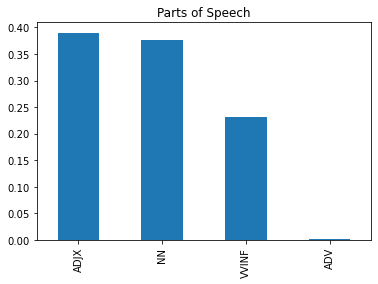

In [28]:
df['pos'].value_counts(normalize=True).plot(kind='bar', title='Parts of Speech')
plt.show()

In [74]:
df['wortzahl'] = df['formen'].str.split(',').str.len() # Wow that took tooooooooo long to "figure out" 
    # https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
df.head(15)

,worte,pos,zahl,formen,wortzahl
0,Abbau,NN,-0.058,"Abbaus,Abbaues,Abbauen,Abbaue,Abbauten",5
1,Abbruch,NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen,Abbruche",5
2,Abdankung,NN,-0.0048,Abdankungen,1
3,Abdämpfung,NN,-0.0048,Abdämpfungen,1
4,Abfall,NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen,Abfalle",5
5,Abfuhr,NN,-0.3367,Abfuhren,1
6,Abgrund,NN,-0.3465,"Abgründe,Abgrunde,Abgrundes,Abgrunds,Abgründen",5
7,Abhängigkeit,NN,-0.3653,Abhängigkeiten,1
8,Ablehnung,NN,-0.5118,Ablehnungen,1
9,Ablenkung,NN,-0.0435,Ablenkungen,1


In [75]:
df['wortzahl'].value_counts()

15    658
1     486
9     132
10     89
4      75
2      64
5      59
16     44
11     43
3      37
8      27
21     22
13     22
7      21
12     11
14     11
18      9
17      8
6       4
22      2
20      1
23      1
26      1
Name: wortzahl, dtype: int64

In [76]:
df.sample(20)

,worte,pos,zahl,formen,wortzahl
992,fad,ADJX,-0.0048,"fade,fadstem,fadsten,fadster,fadere,fadstes,fa...",15
11,Abneigung,NN,-0.0048,Abneigungen,1
1191,lasch,ADJX,-0.0048,"laschstes,laschster,lasches,lascher,lascheste,...",21
489,Stau,NN,-0.0438,"Staus,Staues,Staue,Stauen",4
896,dominieren,VVINF,-0.0048,"dominieret,dominierest,dominiertest,dominierte...",9
754,aufbringen,VVINF,-0.0048,"aufbringe,aufbringst,aufbringt,aufbringest,auf...",15
355,Mangel,NN,-0.3669,"Mangels,Mängel,Mängeln",3
36,Affäre,NN,-0.1794,Affären,1
1758,zerfressen,VVINF,-0.0048,"zerfresse,zerfrisst,zerfrißt,zerfresst,zerfreß...",15
1343,schelten,VVINF,-0.3143,"schelte,schilst,schilt,scheltet,scheltest,scha...",15


In [89]:
# ML?!?!??


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(df['zahl']).reshape(-1,1)
y = df['worte']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [90]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

from numpy import array
x = array(X)
x.reshape(-1,1)


y_pred = regressor.predict(X_test)
y_pred

ValueError: could not convert string to float: 'vergewaltigen'